#In notebook, we are going to implement a neural network for linear as well as non-linear regression

____________________________________________
##First off we do the linear regression part

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
rcParams['figure.figsize'] = 16, 8

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Pythin_in_DS/TFRegCSVs/data.csv")

In [6]:
df.shape

(200, 2)

In [ ]:
df.head()

,X,y
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


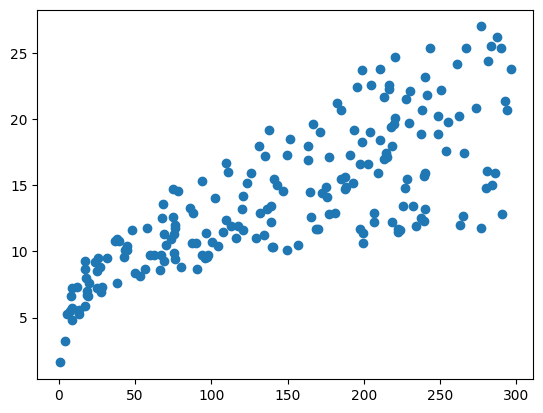

In [ ]:
plt.scatter(df["X"], df["y"])
plt.show()

In [ ]:
# Building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(df["X"], df["y"], callbacks=[callback] ,epochs=300)

Epoch 1/300
7/7 [==============================] - 5s 5ms/step - loss: 45808.3281
Epoch 2/300
7/7 [==============================] - 0s 4ms/step - loss: 40813.4883
Epoch 3/300
7/7 [==============================] - 0s 4ms/step - loss: 36323.9219
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 32028.6367
Epoch 5/300
7/7 [==============================] - 0s 4ms/step - loss: 28053.4258
Epoch 6/300
7/7 [==============================] - 0s 4ms/step - loss: 24475.9941
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 21300.8418
Epoch 8/300
7/7 [==============================] - 0s 4ms/step - loss: 18329.3438
Epoch 9/300
7/7 [==============================] - 0s 4ms/step - loss: 15794.0264
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 13499.1621
Epoch 11/300
7/7 [==============================] - 0s 4ms/step - loss: 11504.2012
Epoch 12/300
7/7 [==============================] - 0s 4ms/step - loss: 9727.9619
Epoch 13/300
7

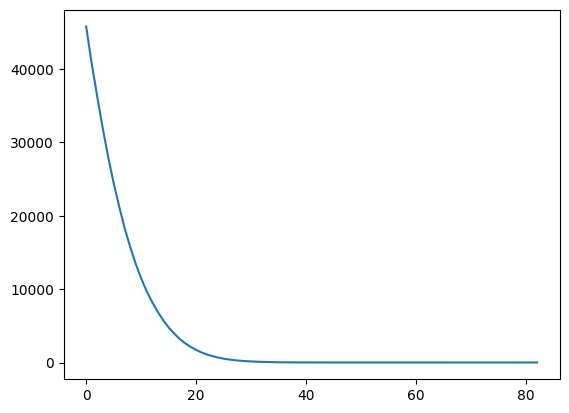

In [ ]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
df["prediction"] = model.predict(df["X"])

7/7 [==============================] - 0s 2ms/step


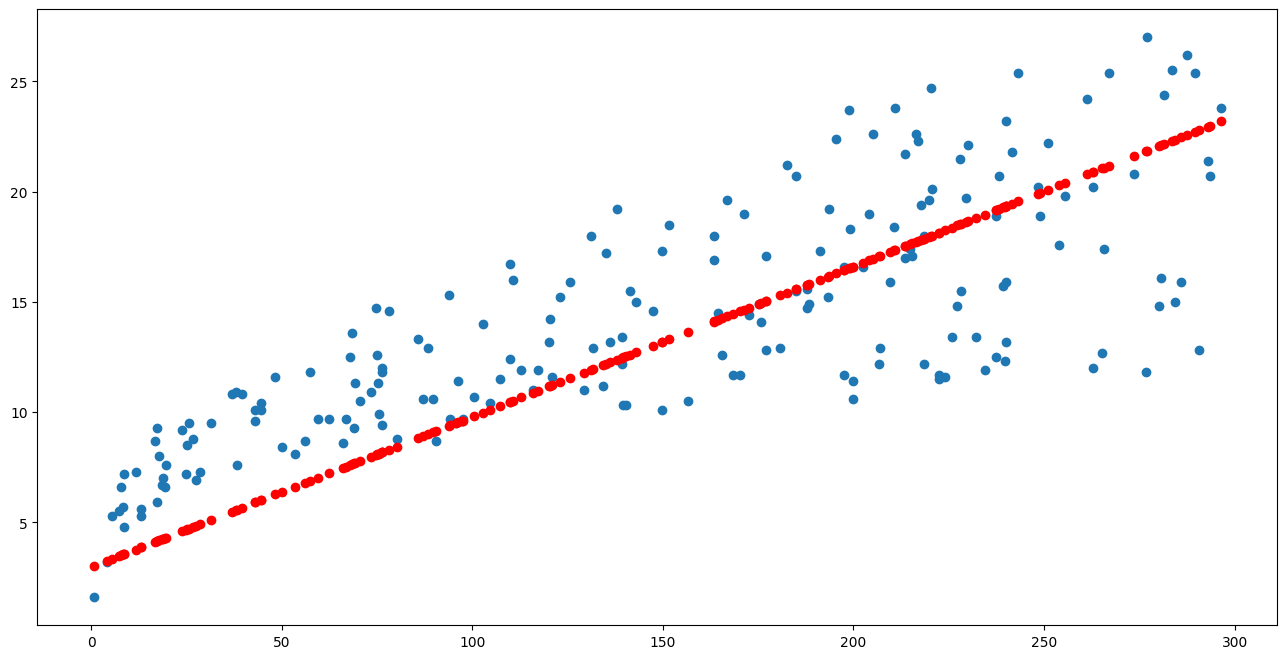

In [ ]:
plt.scatter(df["X"], df["y"])
plt.scatter(df["X"], df["prediction"], color='r')
plt.show()

#Now repeating the same steps for a non-linear regression model

In [ ]:

"""
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
"""
# For non linear regression we utilize multiple dense layers wit non-linear activation functions

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),


    tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(df["X"], df["y"], callbacks=[callback] ,epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 4ms/step - loss: 73.6963
Epoch 2/300
7/7 [==============================] - 0s 3ms/step - loss: 45.6594
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 38.5178
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 44.1018
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 31.7124
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 35.2241
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 26.9726
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 23.0709
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 19.6160
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 19.8190
Epoch 11/300
7/7 [==============================] - 0s 3ms/step - loss: 18.8432
Epoch 12/300
7/7 [==============================] - 0s 4ms/step - loss: 19.0657
Epoch 13/300
7/7 [==============================]

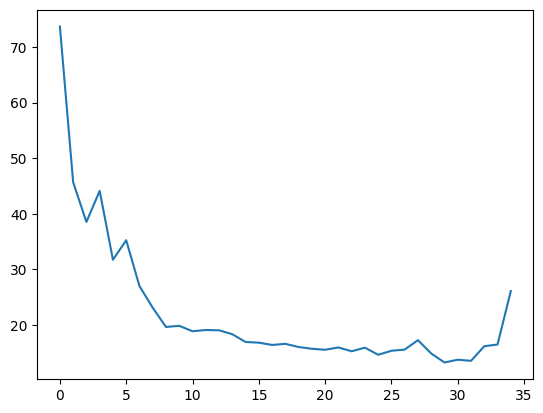

In [ ]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
df["prediction"] = model.predict(df["X"])

7/7 [==============================] - 0s 3ms/step


In [ ]:
df

,X,y,prediction
0,230.1,22.1,15.723089
1,44.5,10.4,6.860660
2,17.2,9.3,5.314331
3,151.5,18.5,11.969927
4,180.8,12.9,13.369007
...,...,...,...
195,38.2,7.6,6.559834
196,94.2,9.7,9.233845
197,177.0,12.8,13.187559
198,283.6,25.5,18.277721


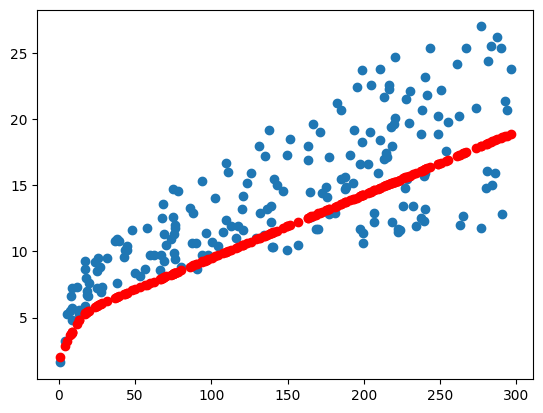

In [ ]:
plt.scatter(df["X"], df["y"])
plt.scatter(df["X"], df["prediction"], color='r')
plt.show()